In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_parquet("servos-data_400.parquet")
df

,OcsMountTrajectory,ImMountTrajectory
0,"[2.3168686635090987, -0.8881824242958953, 5.58...","[2.3168686723193552, -0.8881824628542241, 5.58..."
1,"[2.316864243608608, -0.8881800840327794, 5.585...","[2.3168686741347355, -0.8881824480674113, 5.58..."
2,"[2.3168597929579176, -0.8881777274647025, 5.58...","[2.3168658716420456, -0.8881816609764126, 5.58..."
3,"[2.316855356940028, -0.8881753786213027, 5.585...","[2.316863647486313, -0.8881795285132483, 5.585..."
4,"[2.316850920892059, -0.8881730297387849, 5.585...","[2.3168583820858193, -0.8881766819763529, 5.58..."
...,...,...
295,"[2.3155616161897794, -0.8874893608891846, 5.58...","[2.3155639816133613, -0.8874906895538242, 5.58..."
296,"[2.315557189101046, -0.8874870099939719, 5.584...","[2.315559551588914, -0.8874883372901387, 5.584..."
297,"[2.315552761258539, -0.8874846586753433, 5.584...","[2.315555122086547, -0.8874859804645567, 5.584..."
298,"[2.3155483489144073, -0.8874823155637737, 5.58...","[2.3155506999711446, -0.8874836204543577, 5.58..."


In [3]:
ocs = np.vstack(df["OcsMountTrajectory"])*180/np.pi
im = np.vstack(df["ImMountTrajectory"])*180/np.pi
t = np.arange(ocs.shape[0])/20
zp = ocs[0,:]
zp

array([132.74679611, -50.88910435, 320.04001917])

In [4]:
rel_ocs = (ocs - zp)*3600
rel_im = (im - zp)*3600

Text(0, 0.5, 'Rel. traj. [arcsec]')

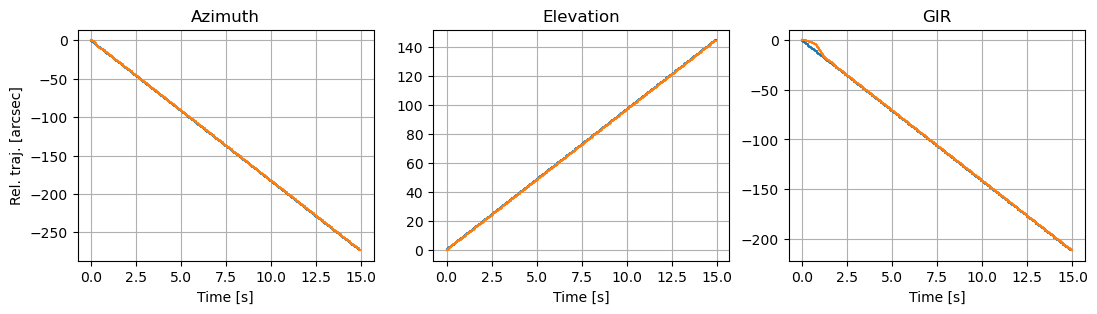

In [5]:
titles = ["Azimuth", "Elevation", "GIR"]
fig, axs = plt.subplots(ncols=3, figsize=(13, 3))
for i in range(3):
    ax = axs[i]
    ax.step(t,rel_ocs[:,i])
    ax.step(t,rel_im[:,i])
    ax.set_xlabel("Time [s]")
    ax.set_title(titles[i])
    ax.grid()
axs[0].set_ylabel("Rel. traj. [arcsec]")

In [9]:
traj_error = (rel_ocs-rel_im)*1e3
traj_error[-1,:]

array([-491.74422506,  269.21909632, -435.77315109])

Text(0, 0.5, 'Rel. traj. error [mas]')

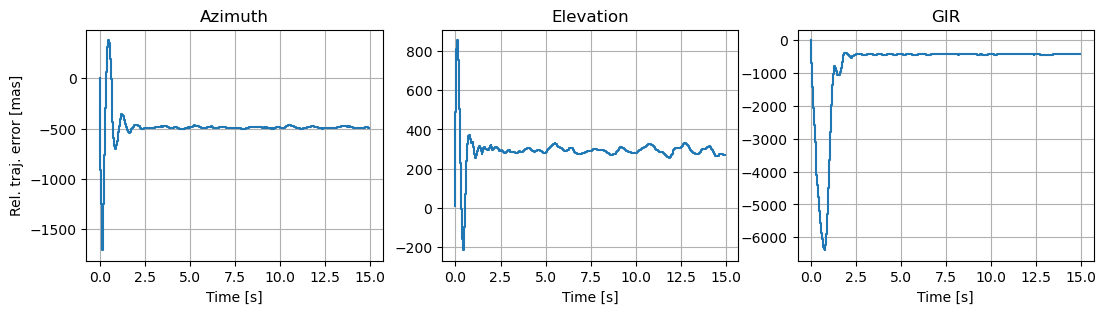

In [10]:
titles = ["Azimuth", "Elevation", "GIR"]
fig, axs = plt.subplots(ncols=3, figsize=(13, 3))
for i in range(3):
    ax = axs[i]
    ax.step(t,traj_error[:,i])
    ax.set_xlabel("Time [s]")
    ax.set_title(titles[i])
    ax.grid()
    #ax.set_xlim(0,5)
axs[0].set_ylabel("Rel. traj. error [mas]")